In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv ('wine_dataset.csv', sep=',' ,quotechar='"', dtype={'Wine Type':'category'})

In [4]:
df.info(

SyntaxError: unexpected EOF while parsing (<ipython-input-4-6e8523f3c78e>, line 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Alcohol                       178 non-null    float64 
 1   Malic acid                    178 non-null    float64 
 2   Ash                           178 non-null    float64 
 3   Alcalinity of ash             178 non-null    float64 
 4   Magnesium                     178 non-null    float64 
 5   Total phenols                 178 non-null    float64 
 6   Flavanoids                    178 non-null    float64 
 7   Nonflavanoid phenols          178 non-null    float64 
 8   Proanthocyanins               178 non-null    float64 
 9   Color intensity               178 non-null    float64 
 10  Hue                           178 non-null    float64 
 11  OD280/OD315 of diluted wines  178 non-null    float64 
 12  Proline                       178 non-null    floa

In [11]:
#Frecuencia Absoluta
x= df['Wine Type'].value_counts().to_frame()

In [7]:
print(x)

       Wine Type
Two           71
One           59
Three         48


In [8]:
x

,Wine Type
Two,71
One,59
Three,48


In [9]:
total = x['Wine Type'].sum()

In [10]:
total

178

In [12]:
#Frecuencia Relativa
def freq_relative(x):
    return (x/total)

In [13]:
#freq_relative(x)

,Wine Type
Two,0.398876
One,0.331461
Three,0.269663


In [14]:
#Crea una columna a X con la frecuencia relativa
#x = x.assign(freq_relative=freq_relative(x['Wine Type']))

In [15]:
x

,Wine Type,freq_relative
Two,71,0.398876
One,59,0.331461
Three,48,0.269663


In [16]:
#Angulo
def angulo(x):
    return freq_relative(x)*360

In [17]:
x = x.assign(freq_relative=freq_relative(x['Wine Type']))

In [18]:
x = x.assign(angulo=angulo(x['Wine Type']))

In [19]:
x.sum()

Wine Type        178.0
freq_relative      1.0
angulo           360.0
dtype: float64

In [20]:
x.describe()

,Wine Type,freq_relative,angulo
count,3.000000,3.000000,3.000000
mean,59.333333,0.333333,120.000000
std,11.503623,0.064627,23.265754
min,48.000000,0.269663,97.078652
25%,53.500000,0.300562,108.202247
50%,59.000000,0.331461,119.325843
75%,65.000000,0.365169,131.460674
max,71.000000,0.398876,143.595506


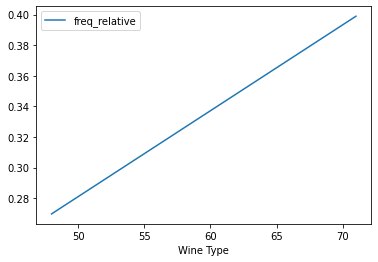

In [21]:
#Plot lineal de la Frecuencia X
x.plot.line(x='Wine Type',y='freq_relative')

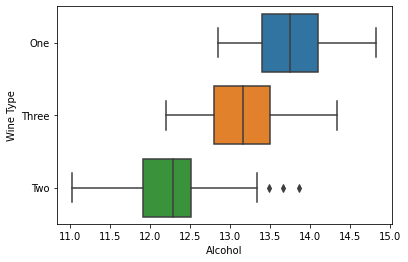

In [22]:
#PLot de caja de Bigote
ax = sns.boxplot(x="Alcohol",y="Wine Type", data = df)

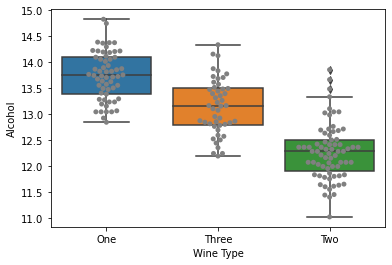

In [23]:
ax = sns.boxplot(x="Wine Type", y="Alcohol", data=df)
ax = sns.swarmplot(x="Wine Type", y="Alcohol", data=df,color="0.50")

In [24]:
 df.groupby('Wine Type').get_group("Two")

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,Two
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,Two
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,Two
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,Two
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,Two
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,Two
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,Two
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,Two
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,Two


In [25]:
#Media y Desviacion
me=df['Alcohol']

In [26]:
me.std()

0.8118265380058575

In [36]:
#Alcalinidad
me1=df['Alcalinity of ash']

3.339563767173505

In [31]:
# Media y Desviacion
t = df.groupby('Wine Type').get_group('Two')

In [30]:
t.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,Two
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,Two
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,Two
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,Two
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,Two


In [32]:
# Alcohol
alcohol = t.groupby('Alcohol').get_group(12.33) 
alcohol

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,Two
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,Two


In [33]:
alcohol.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,2.00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,12.33,1.045000,2.115000,15.400000,118.500000,1.975000,1.470000,0.49000,1.585000,3.335000,1.15500,1.990000,715.000000
std,0.00,0.077782,0.233345,0.848528,24.748737,0.106066,0.537401,0.19799,1.661701,0.091924,0.13435,0.452548,49.497475
min,12.33,0.990000,1.950000,14.800000,101.000000,1.900000,1.090000,0.35000,0.410000,3.270000,1.06000,1.670000,680.000000
25%,12.33,1.017500,2.032500,15.100000,109.750000,1.937500,1.280000,0.42000,0.997500,3.302500,1.10750,1.830000,697.500000
50%,12.33,1.045000,2.115000,15.400000,118.500000,1.975000,1.470000,0.49000,1.585000,3.335000,1.15500,1.990000,715.000000
75%,12.33,1.072500,2.197500,15.700000,127.250000,2.012500,1.660000,0.56000,2.172500,3.367500,1.20250,2.150000,732.500000
max,12.33,1.100000,2.280000,16.000000,136.000000,2.050000,1.850000,0.63000,2.760000,3.400000,1.25000,2.310000,750.000000


In [34]:
alcohol.mean().to_frame()

,0
Alcohol,12.330
Malic acid,1.045
Ash,2.115
Alcalinity of ash,15.400
Magnesium,118.500
Total phenols,1.975
Flavanoids,1.470
Nonflavanoid phenols,0.490
Proanthocyanins,1.585
Color intensity,3.335


In [35]:
alcohol.std()

Alcohol                          0.000000
Malic acid                       0.077782
Ash                              0.233345
Alcalinity of ash                0.848528
Magnesium                       24.748737
Total phenols                    0.106066
Flavanoids                       0.537401
Nonflavanoid phenols             0.197990
Proanthocyanins                  1.661701
Color intensity                  0.091924
Hue                              0.134350
OD280/OD315 of diluted wines     0.452548
Proline                         49.497475
dtype: float64

In [37]:
#Alcalinidad
alcalinidad = t.groupby('Alcalinity of ash').get_group(16.8) 
alcalinidad.mean().to_frame()

,0
Alcohol,12.425
Malic acid,1.275
Ash,1.885
Alcalinity of ash,16.800
Magnesium,125.500
Total phenols,1.935
Flavanoids,1.345
Nonflavanoid phenols,0.335
Proanthocyanins,1.560
Color intensity,4.300


In [38]:
alcalinidad.std()

Alcohol                           0.304056
Malic acid                        0.120208
Ash                               0.190919
Alcalinity of ash                 0.000000
Magnesium                        36.062446
Total phenols                     0.120208
Flavanoids                        0.091924
Nonflavanoid phenols              0.275772
Proanthocyanins                   1.329361
Color intensity                   2.050610
Hue                               0.212132
OD280/OD315 of diluted wines      1.046518
Proline                         189.504617
dtype: float64

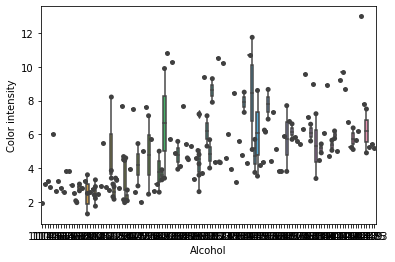

In [39]:
#Relacion entre Alcohol-Intensidad
ax = sns.boxplot(x="Alcohol", y="Color intensity", data =df)
ax = sns.swarmplot(x="Alcohol", y="Color intensity", data=df, color=".25")

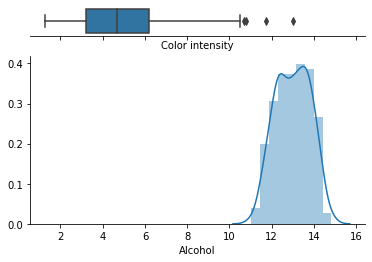

In [40]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={"height_ratios":(.15, .85)})
sns.boxplot(df['Color intensity'], ax = ax_box)
sns.distplot(df['Alcohol'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)